In [31]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [32]:
# Load the spam dataset
# Assuming the path 'spam.csv' is correct and the file is in the expected format
spam_data = pd.read_csv('spam.csv', usecols=['v1', 'v2'], encoding='latin-1')  # Only load the 'Type' and 'Message' columns
spam_data.columns = ['label', 'message']  # Rename columns for clarity

In [33]:
spam_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#convert the label data to binary format
spam_data['label']= spam_data['label'].map({'ham':0, 'spam':1})
spam_data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
y=spam_data['label']
x=spam_data['message']

In [35]:
#splite the data into training and testing data 
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
# Create a text processing and classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert messages to TF-IDF features
    ('logreg', LogisticRegression())  # Apply logistic regression
])


In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('logreg', LogisticRegression())])

In [39]:
y_pred=pipeline.predict(x_test)

In [27]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(roc_auc_score(y_test, pipeline.predict_proba(x_test)[:,1]))

0.9659192825112107
0.9912280701754386
0.7533333333333333
0.9840069084628671


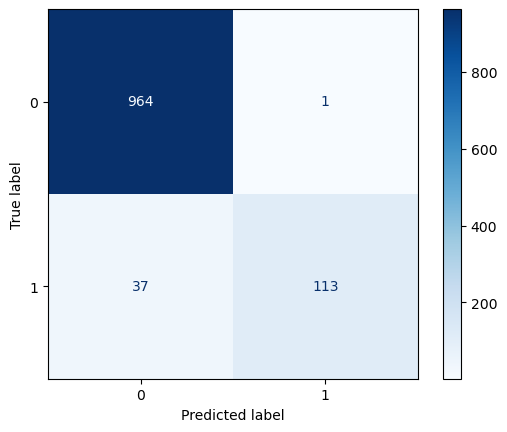

In [48]:
# Output the confusion matrix
classess=[0,1]
cm = confusion_matrix(y_test, y_pred)
result=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classess)
result.plot(cmap='Blues')
plt.show()